In [1]:
# Importing Necessary Libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LogisticRegression

In [2]:
df=pd.read_csv("adult.csv")

In [3]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [4]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'country', 'salary'],
      dtype='object')

In [5]:
df.rename(columns={"education-num":"education_num",
                  "marital-status":"marital_status",
                  "capital-gain":"capital_gain",
                  "capital-loss":"capital_loss",
                  "hours-per-week":"hours_per_week"},inplace=True)

df=df.replace({'-': '_'}, regex=True)


df_cat=df.select_dtypes("object")
df_num=df.select_dtypes("int64")

In [6]:
df.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
country           0
salary            0
dtype: int64

In [7]:
df[df_cat.columns] = df_cat.apply(lambda x: x.str.strip())

df_cat = df_cat.apply(lambda x: x.str.strip())

In [8]:
df_cat.salary.value_counts()

<=50K    24720
>50K      7841
Name: salary, dtype: int64

In [9]:
income_all = df['salary'].value_counts(normalize = True)
income_all*100

#Here we can see that 75.9% people have income below 50k and 
#remaining have income above 50k,so the data here is skewed

<=50K    75.919044
>50K     24.080956
Name: salary, dtype: float64

# Changing >50K as 1 and <=50K as 0

In [10]:
mapping={'<=50K':0,'>50K':1}
df_cat['salary'] = df_cat['salary'].replace(mapping, regex=True)

In [11]:
df_cat.salary.value_counts()

0    24720
1     7841
Name: salary, dtype: int64

# Exploratory Data Anaysis for Categorical Columns

In [12]:
df_cat.columns

Index(['workclass', 'education', 'marital_status', 'occupation',
       'relationship', 'race', 'sex', 'country', 'salary'],
      dtype='object')

In [13]:
#df_cat=df_cat.replace({'-': '_'}, regex=True)

# workclass

In [14]:
df_cat.workclass.value_counts()

Private             22696
Self_emp_not_inc     2541
Local_gov            2093
?                    1836
State_gov            1298
Self_emp_inc         1116
Federal_gov           960
Without_pay            14
Never_worked            7
Name: workclass, dtype: int64

In [15]:
workclass_mode=df_cat["workclass"].mode()[0]
print(workclass_mode)

Private


In [16]:
df_cat["workclass"].unique()

array(['State_gov', 'Self_emp_not_inc', 'Private', 'Federal_gov',
       'Local_gov', '?', 'Self_emp_inc', 'Without_pay', 'Never_worked'],
      dtype=object)

In [17]:
df_cat.loc[(df_cat.workclass=='?'),"workclass"]="workclass_mode"

C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


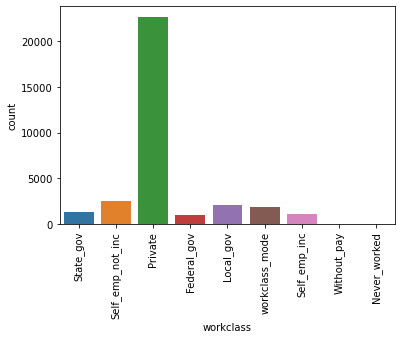

In [18]:
sns.countplot(df_cat.workclass)
plt.xticks(rotation=90)
plt.show()

In [19]:
df_cat["workclass"].value_counts()

Private             22696
Self_emp_not_inc     2541
Local_gov            2093
workclass_mode       1836
State_gov            1298
Self_emp_inc         1116
Federal_gov           960
Without_pay            14
Never_worked            7
Name: workclass, dtype: int64

# education

In [20]:
df_cat["education"].value_counts()

HS_grad         10501
Some_college     7291
Bachelors        5355
Masters          1723
Assoc_voc        1382
11th             1175
Assoc_acdm       1067
10th              933
7th_8th           646
Prof_school       576
9th               514
12th              433
Doctorate         413
5th_6th           333
1st_4th           168
Preschool          51
Name: education, dtype: int64

In [21]:
# Trying to map some categories to available category

In [22]:
df_cat.loc[(df_cat["education"]=="5th_6th")|(df_cat["education"]=="1st_4th"),"education"]="Lower_Grade"
df_cat.loc[(df_cat["education"]=="7th_8th")|(df_cat["education"]=="9th")|(df_cat["education"]=="10th")|
           (df_cat["education"]=="11th")|(df_cat["education"]=="12th"),"education"]="Higher_Grade"

In [23]:
df_cat["education"].value_counts()

HS_grad         10501
Some_college     7291
Bachelors        5355
Higher_Grade     3701
Masters          1723
Assoc_voc        1382
Assoc_acdm       1067
Prof_school       576
Lower_Grade       501
Doctorate         413
Preschool          51
Name: education, dtype: int64

C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


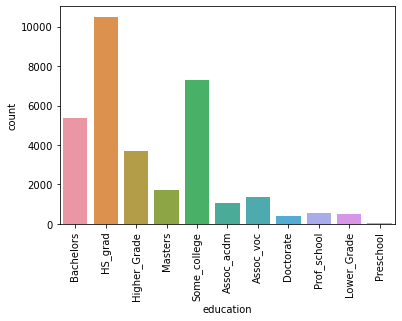

In [24]:
sns.countplot(df_cat["education"])
plt.xticks(rotation=90)
plt.show()

# marital_status

In [25]:
df_cat["marital_status"].value_counts()

Married_civ_spouse       14976
Never_married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married_spouse_absent      418
Married_AF_spouse           23
Name: marital_status, dtype: int64

In [26]:
map2={'Separated':"Divorced"}
df_cat["marital_status"] = df_cat["marital_status"].replace(map2, regex=True)

# Occupation

In [27]:
df_cat["occupation"].value_counts()

Prof_specialty       4140
Craft_repair         4099
Exec_managerial      4066
Adm_clerical         3770
Sales                3650
Other_service        3295
Machine_op_inspct    2002
?                    1843
Transport_moving     1597
Handlers_cleaners    1370
Farming_fishing       994
Tech_support          928
Protective_serv       649
Priv_house_serv       149
Armed_Forces            9
Name: occupation, dtype: int64

In [28]:
df_cat["occupation"].mode()[0]

'Prof_specialty'

In [29]:
df_cat.loc[(df_cat["occupation"]=="?"),"occupation"]=df_cat["occupation"].mode()[0]

In [30]:
df_cat["occupation"].value_counts()

Prof_specialty       5983
Craft_repair         4099
Exec_managerial      4066
Adm_clerical         3770
Sales                3650
Other_service        3295
Machine_op_inspct    2002
Transport_moving     1597
Handlers_cleaners    1370
Farming_fishing       994
Tech_support          928
Protective_serv       649
Priv_house_serv       149
Armed_Forces            9
Name: occupation, dtype: int64

C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


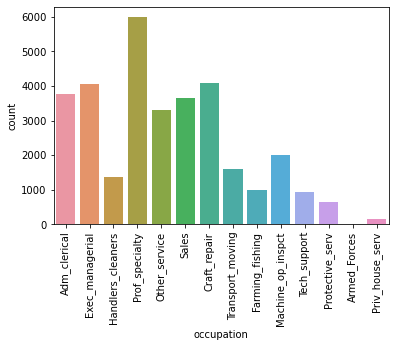

In [31]:
sns.countplot(df_cat["occupation"])
plt.xticks(rotation=90)
plt.show()

# Relationship

In [32]:
df_cat["relationship"].value_counts()

Husband           13193
Not_in_family      8305
Own_child          5068
Unmarried          3446
Wife               1568
Other_relative      981
Name: relationship, dtype: int64

# Race

In [33]:
df_cat["race"].value_counts()

White                 27816
Black                  3124
Asian_Pac_Islander     1039
Amer_Indian_Eskimo      311
Other                   271
Name: race, dtype: int64

In [34]:
df_cat["sex"].value_counts()

Male      21790
Female    10771
Name: sex, dtype: int64

In [35]:
df_cat["country"].value_counts()

United_States                 29170
Mexico                          643
?                               583
Philippines                     198
Germany                         137
Canada                          121
Puerto_Rico                     114
El_Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican_Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France                      

In [36]:
df_cat.loc[(df_cat["country"]=="?"),"country"]=df_cat["country"].mode()[0]

In [37]:
df_cat["country"].value_counts()

United_States                 29753
Mexico                          643
Philippines                     198
Germany                         137
Canada                          121
Puerto_Rico                     114
El_Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican_Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France                           29
Greece                      

# Exploring Numerical Columns

In [38]:
df_num

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,39,77516,13,2174,0,40
1,50,83311,13,0,0,13
2,38,215646,9,0,0,40
3,53,234721,7,0,0,40
4,28,338409,13,0,0,40
...,...,...,...,...,...,...
32556,27,257302,12,0,0,38
32557,40,154374,9,0,0,40
32558,58,151910,9,0,0,40
32559,22,201490,9,0,0,20


array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'fnlwgt'}>],
       [<AxesSubplot:title={'center':'education_num'}>,
        <AxesSubplot:title={'center':'capital_gain'}>],
       [<AxesSubplot:title={'center':'capital_loss'}>,
        <AxesSubplot:title={'center':'hours_per_week'}>]], dtype=object)

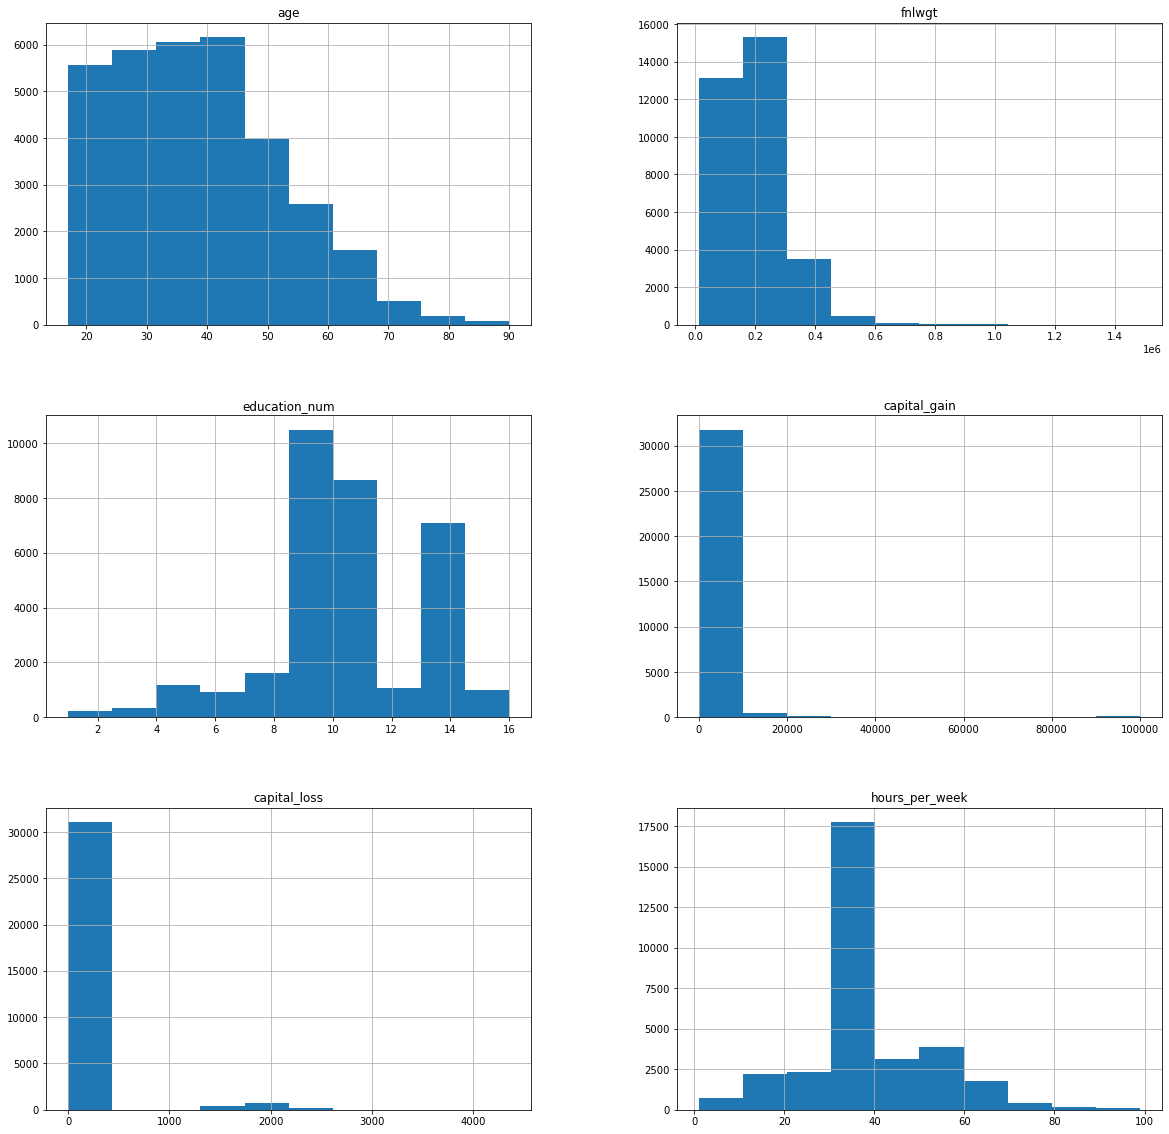

In [39]:
df_num.hist(histtype='stepfilled',figsize = (20,20))

C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


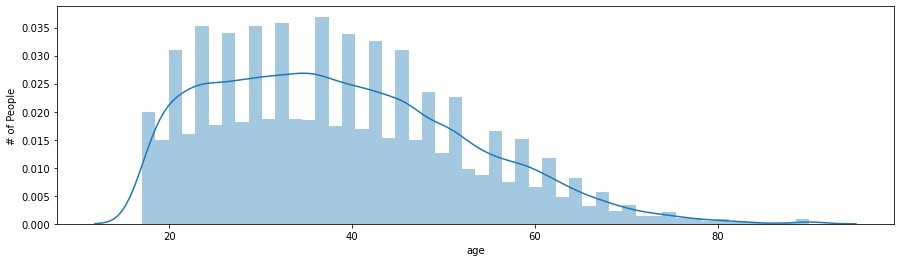

In [40]:
plt.figure(figsize=(15,4))

sns.distplot(df_num['age'])
plt.ticklabel_format(style='scientific', axis='x') #repressing scientific notation on x
plt.ylabel('# of People')
plt.show()

# Finding Correlation between the Variables

In [41]:
numerical_columns=df_num.columns.to_list()
categorical_columns=df_cat.columns.to_list()

<AxesSubplot:>

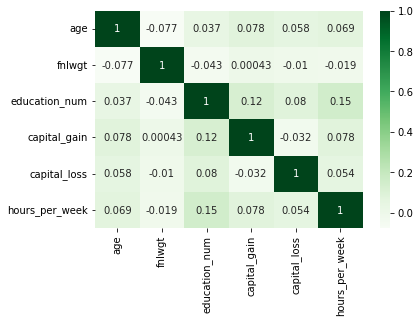

In [42]:
sns.heatmap(df_num.corr(),cmap="Greens",annot=True)

In [43]:
numerical_columns

['age',
 'fnlwgt',
 'education_num',
 'capital_gain',
 'capital_loss',
 'hours_per_week']

In [44]:
#categorical_columns.pop(-1)

In [45]:
#categorical_columns.pop(-1)

In [46]:
categorical_columns

['workclass',
 'education',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'country',
 'salary']

In [47]:
df_cat

,workclass,education,marital_status,occupation,relationship,race,sex,country,salary
0,State_gov,Bachelors,Never_married,Adm_clerical,Not_in_family,White,Male,United_States,0
1,Self_emp_not_inc,Bachelors,Married_civ_spouse,Exec_managerial,Husband,White,Male,United_States,0
2,Private,HS_grad,Divorced,Handlers_cleaners,Not_in_family,White,Male,United_States,0
3,Private,Higher_Grade,Married_civ_spouse,Handlers_cleaners,Husband,Black,Male,United_States,0
4,Private,Bachelors,Married_civ_spouse,Prof_specialty,Wife,Black,Female,Cuba,0
...,...,...,...,...,...,...,...,...,...
32556,Private,Assoc_acdm,Married_civ_spouse,Tech_support,Wife,White,Female,United_States,0
32557,Private,HS_grad,Married_civ_spouse,Machine_op_inspct,Husband,White,Male,United_States,1
32558,Private,HS_grad,Widowed,Adm_clerical,Unmarried,White,Female,United_States,0
32559,Private,HS_grad,Never_married,Adm_clerical,Own_child,White,Male,United_States,0


# Applying One Hot Encoding for Categorical Columns

In [48]:
# Dependent Variable is Salary/Income
y=df_cat.salary

In [49]:
df_cat.drop(['salary', 'country','marital_status','relationship','race'], axis=1, inplace=True)

In [50]:
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder()#drop='first'

In [51]:
ohe.fit(df_cat)

# 3. Transform
df_cat_new = ohe.transform(df_cat).toarray()
df_cat_new.shape

df_cat_new

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [52]:
df_cat_new=pd.DataFrame(df_cat_new)

# Applying Normalization for Numerical Columns

In [53]:
df_num

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,39,77516,13,2174,0,40
1,50,83311,13,0,0,13
2,38,215646,9,0,0,40
3,53,234721,7,0,0,40
4,28,338409,13,0,0,40
...,...,...,...,...,...,...
32556,27,257302,12,0,0,38
32557,40,154374,9,0,0,40
32558,58,151910,9,0,0,40
32559,22,201490,9,0,0,20


# Checking for Outliers

C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age'>

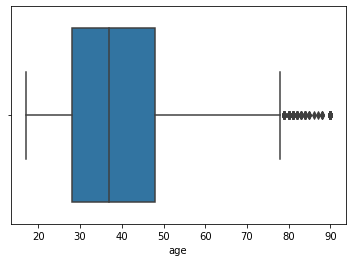

In [54]:
sns.boxplot(df_num["age"])

C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='education_num'>

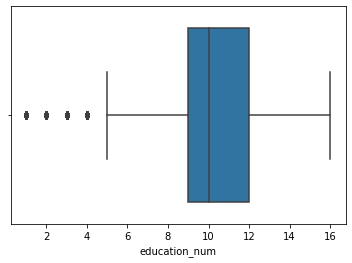

In [55]:
sns.boxplot(df_num["education_num"])

In [56]:
df_num["education_num"].value_counts()

9     10501
10     7291
13     5355
14     1723
11     1382
7      1175
12     1067
6       933
4       646
15      576
5       514
8       433
16      413
3       333
2       168
1        51
Name: education_num, dtype: int64

In [57]:
df_num["capital_loss"].value_counts()

0       31042
1902      202
1977      168
1887      159
1848       51
        ...  
2080        1
1539        1
1844        1
2489        1
1411        1
Name: capital_loss, Length: 92, dtype: int64

In [58]:
df_num["capital_gain"]

0         2174
1            0
2            0
3            0
4            0
         ...  
32556        0
32557        0
32558        0
32559        0
32560    15024
Name: capital_gain, Length: 32561, dtype: int64

In [59]:
df_num["hours_per_week"].value_counts() # need to be normalized

40    15217
50     2819
45     1824
60     1475
35     1297
      ...  
82        1
92        1
87        1
74        1
94        1
Name: hours_per_week, Length: 94, dtype: int64

C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='hours_per_week'>

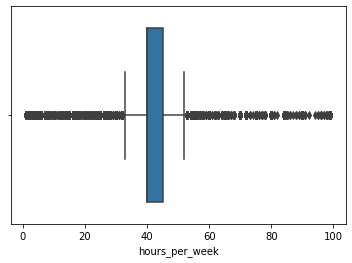

In [60]:
sns.boxplot(df_num["hours_per_week"])

In [61]:
df_num["age"].value_counts()

36    898
31    888
34    886
23    877
35    876
     ... 
83      6
88      3
85      3
86      1
87      1
Name: age, Length: 73, dtype: int64

In [62]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# transform data
scaled = scaler.fit_transform(df_num)
print(scaled)

[[ 0.03067056 -1.06361075  1.13473876  0.1484529  -0.21665953 -0.03542945]
 [ 0.83710898 -1.008707    1.13473876 -0.14592048 -0.21665953 -2.22215312]
 [-0.04264203  0.2450785  -0.42005962 -0.14592048 -0.21665953 -0.03542945]
 ...
 [ 1.42360965 -0.35877741 -0.42005962 -0.14592048 -0.21665953 -0.03542945]
 [-1.21564337  0.11095988 -0.42005962 -0.14592048 -0.21665953 -1.65522476]
 [ 0.98373415  0.92989258 -0.42005962  1.88842434 -0.21665953 -0.03542945]]


In [63]:
df_num_new=pd.DataFrame(scaled)

In [64]:
df_num_new.shape

(32561, 6)

In [65]:
X=pd.concat([df_cat_new,df_num_new],axis=1)

In [66]:
X

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,0,1,2,3,4,5
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.030671,-1.063611,1.134739,0.148453,-0.21666,-0.035429
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.837109,-1.008707,1.134739,-0.145920,-0.21666,-2.222153
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,-0.042642,0.245079,-0.420060,-0.145920,-0.21666,-0.035429
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.057047,0.425801,-1.197459,-0.145920,-0.21666,-0.035429
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,-0.775768,1.408176,1.134739,-0.145920,-0.21666,-0.035429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,-0.849080,0.639741,0.746039,-0.145920,-0.21666,-0.197409
32557,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.103983,-0.335433,-0.420060,-0.145920,-0.21666,-0.035429
32558,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.423610,-0.358777,-0.420060,-0.145920,-0.21666,-0.035429
32559,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,-1.215643,0.110960,-0.420060,-0.145920,-0.21666,-1.655225


# Splitting Train and Test Dataset

In [67]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.2,random_state=2)

In [68]:
xtrain.shape,xtest.shape,ytrain.shape,ytest.shape

((26048, 42), (6513, 42), (26048,), (6513,))

# Logistic Regression Model Building

In [69]:
from sklearn.linear_model import LogisticRegression

In [70]:
lr=LogisticRegression()

In [71]:
lr.fit(xtrain,ytrain)

C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [72]:
ypred_lr=lr.predict(xtest)

In [73]:
lr.score(xtrain,ytrain)

0.833039004914005

In [74]:
lr.score(xtest,ytest)

0.8257331490864425

# Metrics

In [75]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [76]:
confusion_matrix(ytest,ypred_lr)

array([[4626,  302],
       [ 833,  752]], dtype=int64)

In [77]:
print(classification_report(ytest,ypred_lr))

              precision    recall  f1-score   support

           0       0.85      0.94      0.89      4928
           1       0.71      0.47      0.57      1585

    accuracy                           0.83      6513
   macro avg       0.78      0.71      0.73      6513
weighted avg       0.81      0.83      0.81      6513



In [78]:
accuracy_score(ytest,ypred_lr)

0.8257331490864425

In [79]:
#lr.score(xtrain,ytrain)

In [80]:
#lr.score(xtest,ytest)

# Saving Model for Deployment

In [81]:
for i in df_cat:
    print(i,df_cat[i].unique())

workclass ['State_gov' 'Self_emp_not_inc' 'Private' 'Federal_gov' 'Local_gov'
 'workclass_mode' 'Self_emp_inc' 'Without_pay' 'Never_worked']
education ['Bachelors' 'HS_grad' 'Higher_Grade' 'Masters' 'Some_college'
 'Assoc_acdm' 'Assoc_voc' 'Doctorate' 'Prof_school' 'Lower_Grade'
 'Preschool']
occupation ['Adm_clerical' 'Exec_managerial' 'Handlers_cleaners' 'Prof_specialty'
 'Other_service' 'Sales' 'Craft_repair' 'Transport_moving'
 'Farming_fishing' 'Machine_op_inspct' 'Tech_support' 'Protective_serv'
 'Armed_Forces' 'Priv_house_serv']
sex ['Male' 'Female']
